### Data Analyze
created by Shulan Yan at Jul.18.2021 \
contact me : yansl【at】stu.xmu.edu.cn

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy.stats import binned_statistic_2d, chi2
import sys, math, h5py, os, random
import csv
import illustris_python as il

In [99]:
fitpath = 'fitdata_xyz/fitpara/'
names = os.listdir(fitpath)

In [88]:
names[0]

'fitpara_0.csv'

In [69]:
jj = 0  ## file number
paradata = pd.read_csv(fitpath + paraname +str(jj)+'.csv')

In [70]:
paradata.logn.values

array([10.95946689, 10.94163177, 13.13997495, 10.9628586 , 10.90885899,
       12.99763749, 11.09549927, 12.84770219, 11.92194022, 12.20823278,
       12.21941705,  8.51851249, 13.20164205, 11.30070379, 11.05851572,
       11.83484023, 12.51508552, 12.34319079, 14.34426397, 12.29944708,
        9.44255152, 12.68286444, 11.0156952 , 11.1622093 , 10.99109759])

In [100]:
def getnum(logn):
    num = 0
    for i in range(len(names)):
        paradata1 = pd.read_csv(fitpath + names[i])
        logn_fit1 = paradata1.logn.values
        ind1 = np.where(np.logical_and(logn_fit1 >= logn , logn_fit1 < (logn+0.2)))[0]
        num = num + len(ind1)
    return num

In [12]:
logN = np.linspace(12.2,17,25)

In [101]:
num_sim = []
for i in range(len(logN)):
    num_sim.append(getnum(logN[i]))

**get the distribution function $f(N_{HI},z)$**
### $f(logN_{HI},z)=\frac{d^2\mathcal{N}}{dlogNdz}$
In the results of simulaiton , the redshift pathlength $dz=0.025$

In [16]:
num_sim = np.array(num_sim)
f_sim = num_sim/(0.2*0.025*300)

In [102]:
dnum_dz_sim = []
for i in range(len(f_sim)):
    length = len(f_sim)
    dnum_dz_sim.append(sum(f_sim[i:length])*0.2)

**data of Danforth**

In [18]:
def poisson_err(CL,k):
    '''CL means the confidence level'''
    low, high = (chi2.ppf(1-CL, 2*k) / 2, chi2.ppf(CL, 2*k + 2) / 2)
    if k == 0: 
        low = 0.0
    return low, high

In [56]:
num_dan16 = np.array([21,95,194,292,383,368,267,253,164,119,90,64,60,27,26,19,19,8,15,9,5,1,1,2,2])
dz_dan16 = np.array([0.18,0.93,3.67,9.79,16.46,18.78,19.23,19.70,20.18,20.93,21.53,21.70,
                  21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74,21.74])
f_dan16 = num_dan16/(dz_dan16*0.2)

In [57]:
dnum_dz_dan16 = []
for i in range(len(f_dan16)):
    length = len(f_dan16)
    dnum_dz_dan16.append(sum(f_dan16[i:length])*0.2)

In [58]:
lower_error = np.array([400,310,120,40,10,5,12,5,5,4,3,2,2,1.5,1.5,1.1,1.3,0.8,1.2,0.8,0.7,0,0.29,0.45,0.29])
upper_error = np.array([1000,1000,1000,80,10,5,17,5,5,4,4,3,3,1.9,1.9,1.5,1.7,1.3,1.6,1.3,1.1,0.65,0.81,0.93,0.81])
asymmetric_error = [lower_error, upper_error]
num_nu_low = (f_dan16 - lower_error) * 0.2 * dz_dan16
num_nu_up = (f_dan16 + upper_error) * 0.2 * dz_dan16

In [62]:
num_nu_low = np.array(num_nu_low)
num_nu_up = np.array(num_nu_up)
f_dan16_low = num_nu_low/(dz_dan16*0.2)
f_dan16_up = num_nu_up/(dz_dan16*0.2)
num_nu_low_err,num_nu_up_err = [],[]
for i in range(len(num_nu_low)):
    length = len(num_nu_low)
    num_nu_low_err.append(dnum_dz_dan16[i] - sum(f_dan16_low[i:length])*0.2)
    num_nu_up_err.append(sum(f_dan16_up[i:length])*0.2 - dnum_dz_dan16[i])
asy_num_err = [(num_nu_low_err),(num_nu_up_err)]

**data of other simulation or models**

In [44]:
f_hm12 = []
for i in range(len(logN)):
    if logN[i] < 15:
        f_hm12.append(10**8.238*(10**logN[i])**(-1.5)*(10**(logN[i]+0.2)-10**logN[i])/0.2)
    else:
        f_hm12.append(10**15.74*(10**logN[i])**(-2)*(10**(logN[i]+0.2)-10**logN[i])/0.2)
f_hm12 = np.array(f_hm12)

dnum_dz_hm12 = []
for i in range(len(f_hm12)):
    length = len(f_hm12)
    dnum_dz_hm12.append(sum(f_hm12[i:length])*0.2)

In [41]:
st17_logN = [12.6,12.8,13,13.2,13.4,13.6,13.8,14,14.2,14.4]
f_st17 = [270,265,240,135,100,64,40,38,12,5.8]
f_km14hm01 = [310,242,190,135,90,58,38,21,21,5.2]
dnum_dz_st17 = []
dnum_dz_km14hm01 = []
for i in range(len(st17_logN)):
    length = len(st17_logN)
    dnum_dz_st17.append(sum(f_st17[i:length])*0.2)
    dnum_dz_km14hm01.append(sum(f_km14hm01[i:length])*0.2)

In [43]:
num_altay11 = np.array([3598,4062,4135,3651,2918,2144,1362,842,466,254,145,73,49,40,25,19,11])
altay11_logN = np.linspace(12.5,16.5,17)
f_altay11 = num_altay11/(0.25*133)
dnum_dz_altay11 = []
for i in range(len(num_altay11)):
    length = len(num_altay11)
    dnum_dz_altay11.append(sum(f_altay11[i:length]*0.25))

#### plot the results

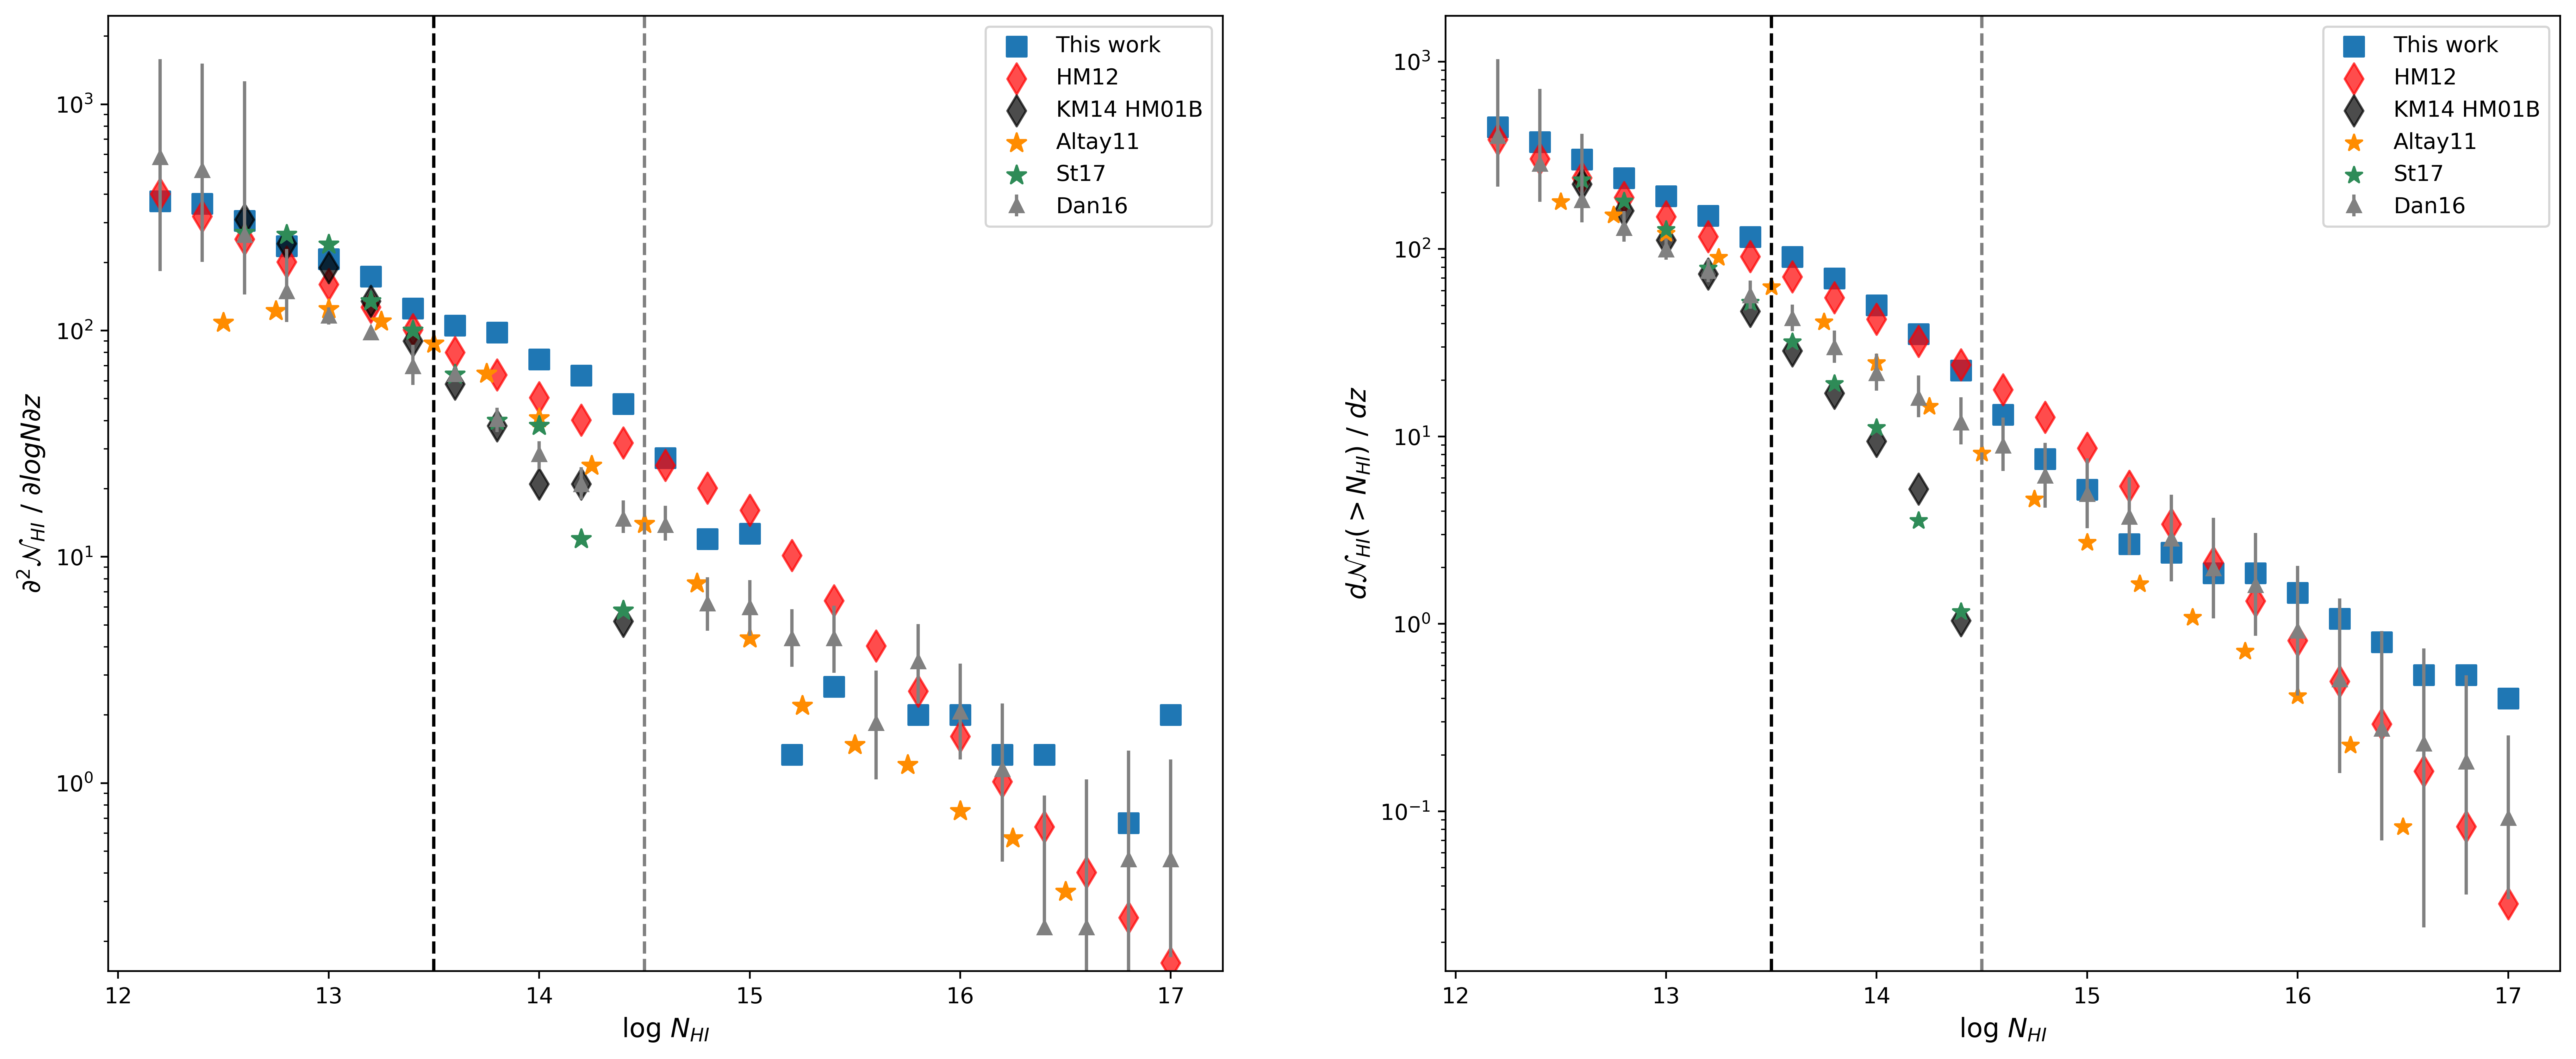

In [103]:
fig,ax = plt.subplots(1,2,figsize = (20,8),dpi = 500)
ax[0].scatter(logN,f_sim,marker = 's',s = 80, label = 'This work')
ax[0].errorbar(logN,f_dan16,yerr = asymmetric_error, fmt = '^' , color = 'gray',alpha = 1,label = 'Dan16')
ax[0].scatter(logN,(f_hm12),marker = 'd',color = 'red', alpha = 0.7,label = 'HM12',s = 100)
ax[0].scatter(st17_logN,f_km14hm01,marker = 'd',label = 'KM14 HM01B',color = 'black',alpha = 0.7, s = 100)
ax[0].scatter(altay11_logN,f_altay11,marker = '*',label = 'Altay11',color = 'darkorange',s = 80)
ax[0].scatter(st17_logN,f_st17,marker = '*',label = 'St17',color = 'seagreen',s = 80)
ax[0].axvline(x = 13.5,linestyle = '--',color = 'black',alpha = 1)
ax[0].axvline(x = 14.5,linestyle = '--',color = 'gray',alpha = 1)
ax[0].set_yscale('log')
ax[0].set_xlabel('log $N_{HI}$',size = 12)
ax[0].set_ylabel('$\partial^2\mathcal{N}_{HI}\ /\ \partial logN\partial z$',size = 12)
ax[0].legend(loc='upper right')
ax[1].scatter(logN,dnum_dz_sim,marker = 's',label = 'This work',s = 80)
ax[1].scatter(logN,(dnum_dz_hm12),marker = 'd',color = 'red', alpha = 0.7,label = 'HM12',s = 100)
ax[1].scatter(st17_logN,dnum_dz_km14hm01,marker = 'd',label = 'KM14 HM01B',color = 'black',alpha = 0.7,s = 100)
ax[1].errorbar(logN,(dnum_dz_dan16),yerr = asy_num_err, fmt = '^', color = 'gray',alpha = 1,label = 'Dan16')
ax[1].scatter(altay11_logN,dnum_dz_altay11,marker = '*', label = 'Altay11',color = 'darkorange', s = 60)
ax[1].scatter(st17_logN,dnum_dz_st17,marker = '*', label = 'St17', color = 'seagreen',s = 60)
ax[1].axvline(x = 13.5,linestyle = '--',color = 'black',alpha = 1)
ax[1].axvline(x = 14.5,linestyle = '--',color = 'gray',alpha = 1)
ax[1].set_yscale('log')
ax[1].set_xlabel('log $N_{HI}$',size = 12)
ax[1].set_ylabel('$d\mathcal{N}_{HI}(>N_{HI})\ /\ dz$',size = 12)
ax[1].legend(loc='upper right')
fig.savefig('tng100-3.jpg')
fig.show()